In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
def parse_currennt(log_file):
    '''
    Parse a logfile from currennt run.
    
    :parameters:
        - log_file : str
            Path to currennt experiment log
    :returns:
        - times : np.ndarray
            Times, in seconds, of each epoch
        - costs : np.ndarray
            Validation cost after each epoch
        - errors : np.ndarray
            Validation error after each epoch
    '''
    time = 0
    times = []
    costs = []
    errors = []
    with open(log_file, 'r') as f:
        for line in f:
            if line[:4] == '    ':
                result_row = [i.strip() for i in line.split('|')]
                times.append(time)
                time += float(result_row[1])
                error, cost = result_row[3].split('%')
                errors.append(float(error))
                costs.append(float(cost))
    return times, costs, errors

In [6]:
def parse_rnnlib(log_file):
    '''
    Parse a logfile from rnnlib experiment
    
    :parameters:
        - log_file : str
            Path to currennt experiment log
    :returns:
        - times : np.ndarray
            Times, in seconds, of each epoch
        - costs : np.ndarray
            Validation cost after each epoch
        - errors : np.ndarray
            Validation error after each epoch
    '''
    time = 0
    times = []
    costs = []
    errors = []
    validation = False
    with open(log_file, 'r') as f:
        for line in f:
            if 'minutes' in line:
                times.append(time)
                split_line = line.split(' ')
                time += float(split_line[3])*60 + float(split_line[5])
            if 'train errors' in line:
                validation = False
            if 'validation errors' in line:
                validation = True
            if 'classificationError' in line and '%' in line and validation:
                errors.append(float(line.split(' ')[1][:-2]))
            if 'crossEntropyError' in line and 'best' not in line and validation:
                costs.append(float(line.split(' ')[1]))
    return times, costs, errors

In [11]:
def parse_nntools(log_file):
    '''
    Parse a logfile from nntools experiment
    
    :parameters:
        - log_file : str
            Path to nntools experiment log
    :returns:
        - times : np.ndarray
            Times, in seconds, of each epoch
        - costs : np.ndarray
            Validation cost after each epoch
        - errors : np.ndarray
            Validation error after each epoch
    '''
    time = 0
    times = []
    costs = []
    errors = []
    validation = False
    with open(log_file, 'r') as f:
        for line in f:
            if 'Epoch' in line:
                times.append(time)
                fields = line.split(',')
                time += float(fields[0].split('took ')[1])
                costs.append(float(fields[1].split(' = ')[1]))
                errors.append(float(fields[2].split(' = ')[1])*100)
    return times, costs, errors

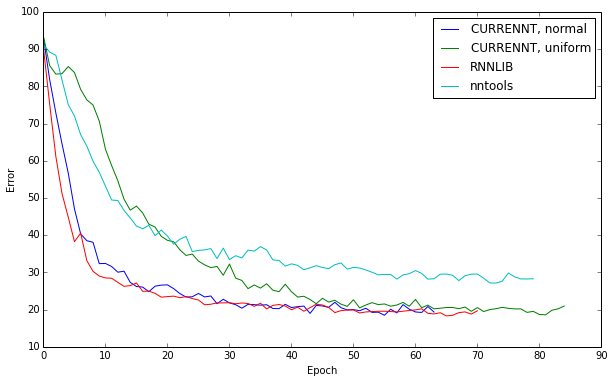

In [15]:
plt.figure(figsize=(10,6))
times, costs, errors = parse_currennt('currennt/normal.log')
plt.plot(errors)
times, costs, errors = parse_currennt('currennt/uniform.log')
plt.plot(errors)
times, costs, errors = parse_rnnlib('rnnlib/classification@2014.10.25-07.51.41.157093.log')
plt.plot(errors)
times, costs, errors = parse_nntools('nntools/experiment.log')
plt.plot(errors[:80])
plt.legend(['CURRENNT, normal', 'CURRENNT, uniform', 'RNNLIB', 'nntools'])
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.savefig('errors.png')